<a href="https://colab.research.google.com/github/Cubosu/20200716_deeplearn/blob/master/data__agumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
from matplotlib import pyplot as plt
# Plot inline
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [4]:
imgForTest = "/content/dog.jpg"
#imgForTest =  = 'small-2000/train/dogs/dog.87.jpg'

(226, 223, 3)
(1, 226, 223, 3)


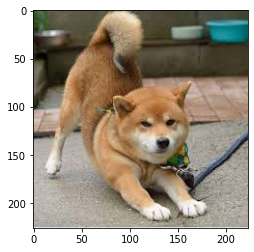

In [5]:
img = cv2.imread(imgForTest)  # this is a PIL image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
plt.imshow(img)
print(img.shape)
img = img.reshape((1,) + img.shape)
print(img.shape)
#x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
#x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)


In [6]:
datagen = ImageDataGenerator(
    zca_whitening=False,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

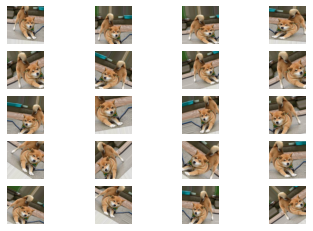

In [11]:
i = 0
for batch in datagen.flow(img, batch_size=10,
    save_to_dir='test', save_prefix='dog', save_format='jpg'):
    plt.subplot(5,4,1 + i)
    plt.axis("off")
    
    augImage = batch[0]
    augImage = augImage.astype('float32')
    augImage /= 255
    plt.imshow(augImage)
    
    i += 1
    if i > 19:
        break  # otherwise the generator would loop indefinitely

In [21]:
# 刪除test裡的file


# import os, shutil
# folder = '/content/test'
# for filename in os.listdir(folder):
#     file_path = os.path.join(folder, filename)
#     try:
#         if os.path.isfile(file_path) or os.path.islink(file_path):
#             os.unlink(file_path)
#         elif os.path.isdir(file_path):
#             shutil.rmtree(file_path)
#     except Exception as e:
#         print('Failed to delete %s. Reason: %s' % (file_path, e))